<a href="https://colab.research.google.com/github/meng19951027/OUC-/blob/main/SLSM_by_FR_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio
from matplotlib import cm,colors
from rasterio.plot import show
import pandas as pd
sns.set(font= "Times new roman",style="ticks",font_scale=1.2,rc={"font.size":10})
import warnings
warnings.filterwarnings("ignore")

# Import training and test set files

In [ ]:
data_train=pd.read_excel(r'FR-ML-dataset.xlsx',sheet_name=0)
data_selection=data_train.drop(['Refault','Revessel'],axis=1)
xtrain=data_selection.iloc[:,:-1]
ytrain=data_selection.iloc[:,-1]
print(xtrain)
print(ytrain)

data_test=pd.read_excel(r'FR-ML-dataset.xlsx',sheet_name=1)
data_selection2=data_test.drop(['Refault','Revessel'],axis=1)
xtest=data_selection2.iloc[:,:-1]
ytest=data_selection2.iloc[:,-1]
print(xtest)
print(ytest)

      Rebathymeter  Recurvatue  Repipeline  Resediment  Resesimic  Reslope  \
0                3           2           2           2          1        5   
1                2           2           2           2          1        4   
2                2           2           2           2          1        1   
3                2           1           2           2          2        7   
4                4           3           2           2          2        7   
...            ...         ...         ...         ...        ...      ...   
2056             1           2           3           5          1        1   
2057             1           2           2           5          1        1   
2058             5           2           4           5          1        1   
2059             4           2           1           5          1        1   
2060             4           2           2           5          1        2   

      Revolcano  
0             8  
1             8  
2        

# Model establishment and training

## ML

### Logistic regression

In [ ]:
def LR(xtrain,ytrain):
    from sklearn.linear_model import LogisticRegression
    parameters_logistic = {'C': [0.001, 0.01, 0.1,1,10],
                           'penalty': ['l1', 'l2'],
                          }
    from sklearn.model_selection import GridSearchCV
    logistic_model_grid=LogisticRegression()
    grid_model_logistic=GridSearchCV(logistic_model_grid,parameters_logistic,cv=10,n_jobs=-1)
    grid_model_logistic.fit(xtrain,ytrain)
    print('the best parameters : {}'.format(grid_model_logistic.best_params_))
    para=grid_model_logistic.best_params_
    best_model_lr=LogisticRegression(C=para['C'],
                                     penalty=para['penalty'],
                                    )
    best_model_lr.fit(xtrain,ytrain)
    return best_model_lr
best_model_lr=LR(xtrain,ytrain)
print(best_model_lr.score(xtrain,ytrain))
print(best_model_lr.score(xtest,ytest))

the best parameters : {'C': 1, 'penalty': 'l2'}
0.9344978165938864
0.9150622876557192


### Random forest

In [ ]:
def RF(xtrain,ytrain):
    from sklearn.ensemble import RandomForestClassifier
    rf_simple = RandomForestClassifier()
    grid_rf =  {'n_estimators': range(10,100,10),
                   'max_depth': range(3,8)
               }
    from sklearn.model_selection import GridSearchCV
    model_rf = GridSearchCV(rf_simple, param_grid = grid_rf,cv =10,n_jobs=-1)
    model_rf.fit(xtrain, ytrain)
    print(model_rf.best_params_)
    para=model_rf.best_params_
    best_model_rf=RandomForestClassifier(n_estimators=para['n_estimators'],
                                         max_depth=para['max_depth'],
                                        )
    best_model_rf.fit(xtrain,ytrain)
    return best_model_rf
best_model_rf=RF(xtrain,ytrain)
print(best_model_rf.score(xtrain,ytrain))
print(best_model_rf.score(xtest,ytest))

{'max_depth': 6, 'n_estimators': 20}
0.9602134885977681
0.9297848244620611


### Artificial nerual network

In [ ]:
def ANN(xtrain,ytrain):
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import GridSearchCV
    param_grid_ann = {"hidden_layer_sizes": [(10),(20),(30),(40),(50),(60),(70),(80),(90),(100)],
                      "solver": ["lbfgs", "sgd", "adam"],
                      "activation":["identity", "logistic", "tanh", "relu"],
                      "learning_rate_init":[0.0001,0.001,0.1]}

    mlp_simple=MLPClassifier()
    model_mlp = GridSearchCV(mlp_simple,param_grid = param_grid_ann,cv =10,verbose=True,n_jobs=-1)
    model_mlp.fit(xtrain, ytrain)
    print(model_mlp.best_params_)
    para=model_mlp.best_params_
    best_model_mlp=MLPClassifier(hidden_layer_sizes=(para['hidden_layer_sizes']),
                                 solver=para['solver'],
                                 activation=para['activation'],
                                 learning_rate_init=para['learning_rate_init'],
                                 random_state=0
                                )
    best_model_mlp.fit(xtrain,ytrain)
    return best_model_mlp
best_model_mlp=ANN(xtrain,ytrain)
print(best_model_mlp.score(xtrain,ytrain))
print(best_model_mlp.score(xtest,ytest))

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
{'activation': 'logistic', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.1, 'solver': 'sgd'}
0.9500242600679282
0.9377123442808607


# Draw learning curves for three models

In [ ]:
landslide_nolandslide=pd.read_excel(r'ML_dataset.xlsx',sheet_name=0)
display(landslide_nolandslide.head())
XX=landslide_nolandslide.iloc[:,:-1].drop(['Refault','Revessel'],axis=1)
display(XX.head())
YY=landslide_nolandslide.iloc[:,-1]

,Rebathymeter,Recurvatue,Refault,Repipeline,Resediment,Resesimic,Reslope,Revessel,Revolcano,class
0,3,2,8,2,2,1,5,1,8,1
1,4,2,8,2,2,1,1,1,8,1
2,2,2,8,2,2,1,4,1,8,1
3,2,2,8,2,2,1,1,1,8,1
4,2,1,8,2,2,2,7,1,8,1


,Rebathymeter,Recurvatue,Repipeline,Resediment,Resesimic,Reslope,Revolcano
0,3,2,2,2,1,5,8
1,4,2,2,2,1,1,8
2,2,2,2,2,1,4,8
3,2,2,2,2,1,1,8
4,2,1,2,2,2,7,8


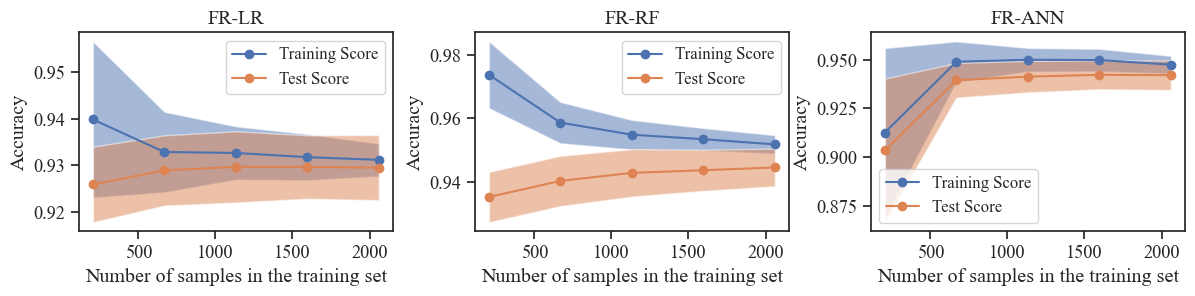

In [ ]:
from sklearn.model_selection import learning_curve
sns.set(font= "Times new roman",style="ticks",font_scale=1.2,rc={"font.size":8})
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
plt.subplots_adjust(wspace=0.5)
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
common_params = {
    "X":XX,
    "y":YY,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.3, random_state=1),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

name=['FR-LR','FR-RF','FR-ANN']

for ax_idx, estimator in enumerate([best_model_lr,best_model_rf,best_model_mlp]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"],fontsize=12,loc='best')
    ax[ax_idx].set_title(name[ax_idx])
plt.tight_layout()
fig.savefig(r'learning_curve.png',dpi=300,bbox_inches='tight')

# Save models

In [ ]:
import joblib
joblib.dump(best_model_lr,r'lr.pkl')
joblib.dump(best_model_rf,r'rf.pkl')
joblib.dump(best_model_mlp,r'ann.pkl')

# Grid data for all factors

In [ ]:
import os
import glob
all_raster_filename=glob.glob(r'Background_value'+'\*.tif')
bb={}
aa=[i.split('\\')[-1] for i in all_raster_filename]
hh=[i.split('.')[0] for i in aa]
print(hh)
for i,j in enumerate(all_raster_filename):
    rs=rasterio.open(j)
    result=rs.read(masked=True)
    bb[hh[i]]=result.compressed()
    print(len(result.compressed()))
    rs.closed
dd=pd.DataFrame(bb)
display(dd)

['Rebathymeter', 'Recurvatue', 'Refault', 'Repipeline', 'Resediment', 'Resesimic', 'Reslope', 'Revessel', 'Revolcano']
27932616
27932616
27932616
27932616
27932616
27932616
27932616
27932616
27932616


,Rebathymeter,Recurvatue,Refault,Repipeline,Resediment,Resesimic,Reslope,Revessel,Revolcano
0,7,2,8,1,1,1,2,1,8
1,7,2,8,1,1,1,1,1,8
2,7,2,8,1,1,1,2,1,8
3,7,2,8,1,1,1,1,1,8
4,7,2,8,1,1,1,2,1,8
...,...,...,...,...,...,...,...,...,...
27932611,1,2,8,1,1,1,2,1,8
27932612,1,2,8,1,1,1,1,1,8
27932613,1,2,8,1,1,1,1,1,8
27932614,1,2,8,1,1,1,1,1,8


# Submarine landslide susceptibiliity

In [ ]:
def susceptibility_plot(model,all_data_fr,transform_base_array,transform_base):
    all_prob=model.predict_proba(all_data_fr)
    Susceptibility=np.ma.masked_array(np.zeros(transform_base_array[0].shape),mask=transform_base_array[0].mask)
    Susceptibility[~transform_base_array[0].mask] = all_prob[:,1]
    fig,ax=plt.subplots(figsize=(5,5))
    show(Susceptibility,transform=transform_base.transform,cmap='RdYlGn_r',ax=ax)
    plt.show()
    return Susceptibility

In [ ]:
rs=rasterio.open(r'Background_value\Rebathymeter.tif')
rs_dem=rs.read(masked=True)

In [ ]:
dd2=dd.drop(['Refault','Revessel'],axis='columns')

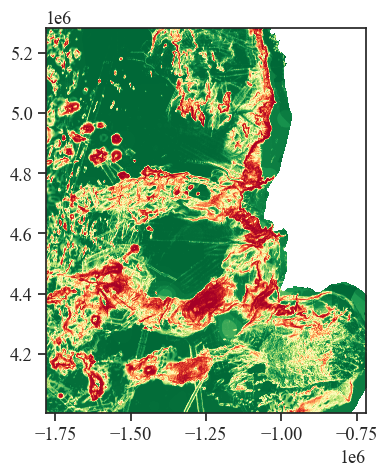

In [ ]:
Susceptibility_lr=susceptibility_plot(best_model_lr,dd2,rs_dem,rs)

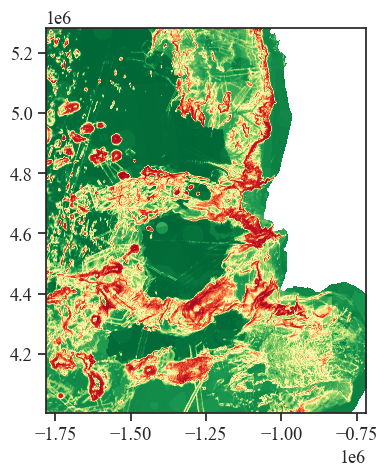

In [ ]:
Susceptibility_rf=susceptibility_plot(best_model_rf,dd2,rs_dem,rs)

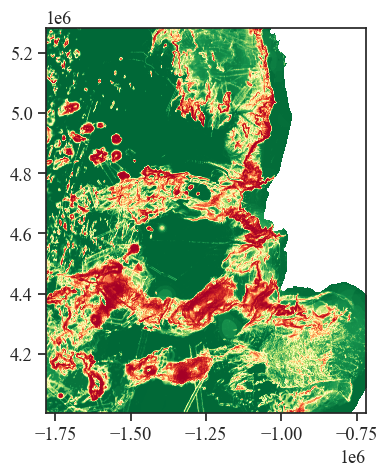

In [ ]:
Susceptibility_mlp=susceptibility_plot(best_model_mlp,dd2,rs_dem,rs)

# Save tif

In [ ]:
def savetif(data,filename,tranform_data):
    height, width = data.shape
    transform = tranform_data.transform
    print(transform)
    crs = tranform_data.crs
    print(crs)
    dtype = data.dtype
    with rasterio.open(filename,'w',driver='GTiff',height=height,width=width,count=1
                       ,dtype=dtype,crs=crs,transform=transform,nodata=9999,) as dst:
        dst.write(data,1)

In [ ]:
savetif(Susceptibility_lr,r'tune_lr_lsm.tif',rs)

| 200.00, 0.00,-1781111.85|
| 0.00,-200.00, 5282777.49|
| 0.00, 0.00, 1.00|
EPSG:3395


In [ ]:
savetif(Susceptibility_rf,r'tune_rf_lsm.tif',rs)

| 200.00, 0.00,-1781111.85|
| 0.00,-200.00, 5282777.49|
| 0.00, 0.00, 1.00|
EPSG:3395


In [ ]:
savetif(Susceptibility_mlp,r'tune_mlp_lsm.tif',rs)

| 200.00, 0.00,-1781111.85|
| 0.00,-200.00, 5282777.49|
| 0.00, 0.00, 1.00|
EPSG:3395


# Evaluation indicators

In [ ]:
import joblib
best_model_lr=joblib.load(r'lr.pkl')
best_model_rf=joblib.load(r'rf.pkl')
best_model_mlp=joblib.load(r'ann.pkl')

In [ ]:
best_model_lr.coef_

array([[-0.2422103 ,  0.33214728,  0.0746754 , -0.74659663,  0.66499502,
         3.550885  , -0.03341851]])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
report_test=classification_report(ytest,best_model_lr.predict(xtest),target_names=['nolandslide','landslide'])
print(r'logistic regression：')
print(report_test)
kappa_test_lr=cohen_kappa_score(ytest,best_model_lr.predict(xtest))
print('test-kappa:',kappa_test_lr)

report_test=classification_report(ytest,best_model_rf.predict(xtest),target_names=['nolandslide','landslide'])
print(r'random forest：')
print(report_test)
kappa_test_rf=cohen_kappa_score(ytest,best_model_rf.predict(xtest))
print('test-kappa:',kappa_test_rf)

report_test=classification_report(ytest,best_model_mlp.predict(xtest),target_names=['nolandslide','landslide'])
print(r'artificial nerual network：')
print(report_test)
kappa_test_mlp=cohen_kappa_score(ytest,best_model_mlp.predict(xtest))
print('test-kappa:',kappa_test_mlp)

逻辑回归的评估指标为：
              precision    recall  f1-score   support

 nolandslide       0.90      0.94      0.92       446
   landslide       0.94      0.89      0.91       437

    accuracy                           0.92       883
   macro avg       0.92      0.91      0.91       883
weighted avg       0.92      0.92      0.91       883

test-kappa: 0.8300166582391548
随机森林的评估指标为：
              precision    recall  f1-score   support

 nolandslide       0.90      0.97      0.93       446
   landslide       0.97      0.89      0.93       437

    accuracy                           0.93       883
   macro avg       0.93      0.93      0.93       883
weighted avg       0.93      0.93      0.93       883

test-kappa: 0.8594447211538956
人工神经网络的评估指标为：
              precision    recall  f1-score   support

 nolandslide       0.91      0.97      0.94       446
   landslide       0.97      0.91      0.94       437

    accuracy                           0.94       883
   macro avg       0.94     

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
sns.set(font= "Times new roman",style="ticks",font_scale=1.0,rc={"font.size":10})
def confusion_matrix_plot(model,model_name,data_x,data_y):
    fig,ax=plt.subplots(1,3,figsize=(9,2))
    for i in range(3):
        matrix_norain = confusion_matrix(data_y, model[i].predict(data_x))
        group_names = ['TN', 'FP','FN', 'TP']
        group_counts = ['{0:0.0f}'.format(value) for value in matrix_norain.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in matrix_norain.flatten()/np.sum(matrix_norain)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        stats_rain = '\n\nAccuracy = {0:.2%}\nError rate = {1:.2%}'.format((matrix_norain[0,0]+matrix_norain[1,1])/np.sum(matrix_norain)
                                                                           ,(matrix_norain[0,1]+matrix_norain[1,0])/np.sum(matrix_norain))

        sns.heatmap(matrix_norain, annot=labels, fmt='', cbar=False, cmap='RdBu',ax=ax[i],
                   annot_kws={'fontname':'Times new roman'
#                               ,'fontweight':'bold'
                             })
        ax[i].set_title(model_name[i])
        ax[i].set_ylabel('True label')
        ax[i].set_xlabel('Predicted label' + stats_rain,fontsize=10)
    plt.subplots_adjust(wspace=0.8)

    plt.show()
    return fig

model=[best_model_lr,best_model_rf,best_model_mlp]
model_name=['FR-LR','FR-RF','FR-ANN']

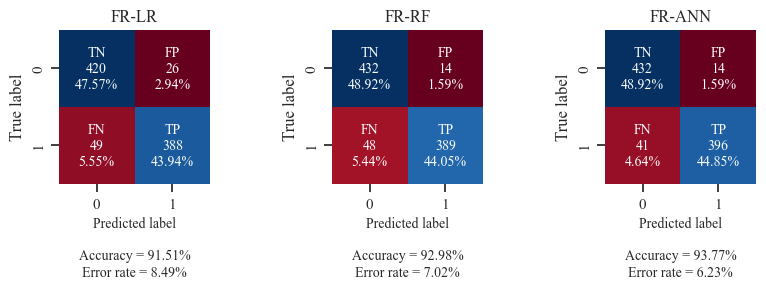

In [ ]:
fig2=confusion_matrix_plot(model,model_name,xtest,ytest)

In [ ]:
fig2.savefig(r'Test_confusion_matrix.png',dpi=300,bbox_inches='tight')

# ROC curve of the test set

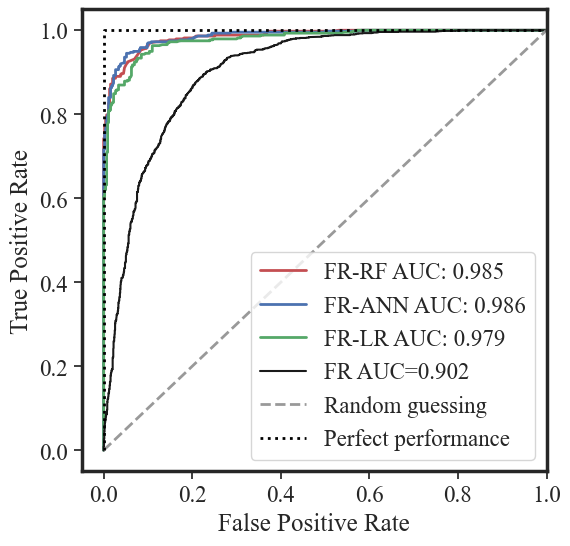

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
sns.set(font= "Times new roman",style="ticks",font_scale=1.5,rc={"font.size":10})
def auc_calc(x_data,y_data,model):
    pred_prob_rf=model.predict_proba(x_data)[:,1]
    fpr1, tpr1, threshold1 = roc_curve(y_data, pred_prob_rf, pos_label=1)
    roc_auc1 = auc(fpr1, tpr1)
    return fpr1,tpr1,roc_auc1
fpr1,tpr1,roc_auc1=auc_calc(xtest,ytest,best_model_rf)
fpr3,tpr3,roc_auc3=auc_calc(xtest,ytest,best_model_mlp)
fpr4,tpr4,roc_auc4=auc_calc(xtest,ytest,best_model_lr)
X_data=[fpr1,fpr3,fpr4]
Y_data=[tpr1,tpr3,tpr4]

from sklearn.metrics import roc_auc_score, roc_curve, auc
color_line=['r','b','g']
auc_value=[roc_auc1,roc_auc3,roc_auc4]
label_text=['FR-RF','FR-ANN','FR-LR']
f, ax = plt.subplots(figsize=(6,6))
for i in range(3):
    plt.plot(X_data[i],Y_data[i], color =color_line[i], lw=2
             ,label= label_text[i] + ' AUC: {:.3f}'.format(auc_value[i]))
fr_roc=pd.read_excel(r'D:\LSM_script\LSM_ML\ROC_curve\ROC.xlsx',sheet_name=0)
plt.plot(fr_roc.iloc[:,0],fr_roc.iloc[:,1],'-k',label='FR AUC=0.902')
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'Random guessing',lw=2)
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black',
         label = 'Perfect performance',lw=2)
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
ax=plt.gca()
axloc=['bottom','top','left','right']
for i in axloc:
    ax.spines[i].set_linewidth(2.5)
plt.show()

In [ ]:
f.savefig(r'Test_fr_roc_abstract.png',dpi=300,bbox_inches='tight')

# Statistical characteristics of susceptibility index

['fr_lsm0~1_Resample.png', 'tune_lr_lsm.png', 'tune_mlp_lsm.png', 'tune_rf_lsm.png']
D:\LSM_script\LSM_ML\易发性结果\fr_lsm0~1_Resample.tif
[0.18123493 0.1417846  0.18123493 ... 0.11084315 0.11084315 0.11084315]
(0.13, 0.13)
(0.22, 0.22)
(0.34, 0.34)
(0.5, 0.5)


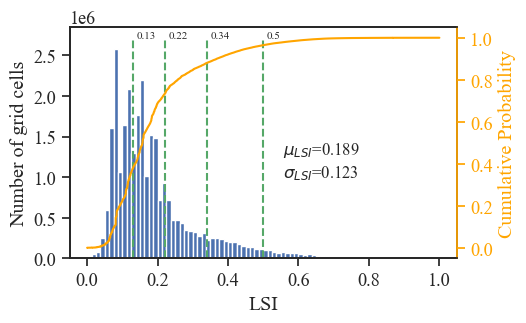

D:\LSM_script\LSM_ML\易发性结果\tune_lr_lsm.tif
[0.29120553 0.01165356 0.29120553 ... 0.04800935 0.04800935 0.04800935]
(0.13, 0.13)
(0.34, 0.34)
(0.56, 0.56)
(0.82, 0.82)


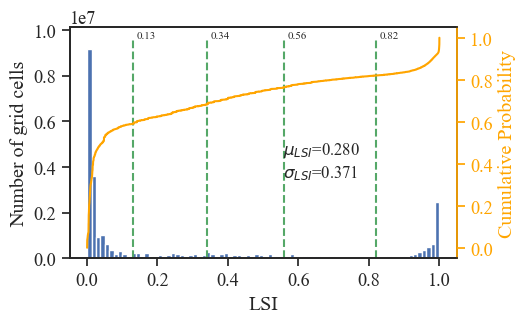

D:\LSM_script\LSM_ML\易发性结果\tune_mlp_lsm.tif
[0.02843218 0.0027721  0.02843218 ... 0.01441444 0.01441444 0.01441444]
(0.12, 0.12)
(0.36, 0.36)
(0.64, 0.64)
(0.88, 0.88)


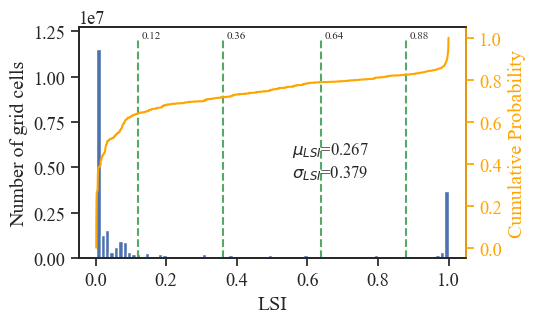

D:\LSM_script\LSM_ML\易发性结果\tune_rf_lsm.tif
[0.05115087 0.02486991 0.05115087 ... 0.05589032 0.05589032 0.05589032]
(0.07, 0.07)
(0.24, 0.24)
(0.52, 0.52)
(0.8, 0.8)


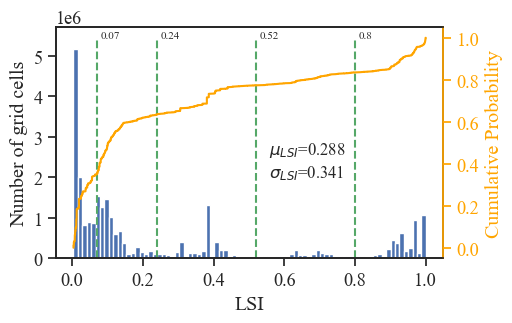

In [ ]:
import glob
all_raster_filename=glob.glob(r'Susceptibility_result'+'\*.tif')
bb={}
aa=[i.split('\\')[-1] for i in all_raster_filename]
hh=[i.split('.')[0]+'.png' for i in aa]
print(hh)

jenks=[[(0.13,0.13,),(0.22,0.22,),(0.34,0.34),(0.50,0.50)]
       ,[(0.13,0.13),(0.34,0.34),(0.56,0.56),(0.82,0.82)]
       ,[(0.12,0.12),(0.36,0.36),(0.64,0.64),(0.88,0.88)]
       ,[(0.07,0.07),(0.24,0.24),(0.52,0.52),(0.80,0.80)]]

for i,j in enumerate(all_raster_filename):
    print(j)
    rs=rasterio.open(j)
    result=rs.read(masked=True)
    print(result.compressed())
    fig=plt.figure(i,figsize=(5,3))
    ax = fig.add_subplot(111)
    ax.hist(result.compressed(),bins=80,color='b')

    ax.set_xlabel(r'LSI')
    ax.set_ylabel(r'Number of grid cells')
    ax.text(0.55,0.45,r'$\mu_{LSI}$='+str(np.mean(result.compressed()))[:5],transform=ax.transAxes,fontsize=12)
    ax.text(0.55,0.35,r'$\sigma_{LSI}$='+str(np.std(result.compressed()))[:5],transform=ax.transAxes,fontsize=12)
    y_min, y_max = plt.ylim()
    for m in range(4):
        print(jenks[i][m])
        ax.plot(jenks[i][m],(y_min,y_max),'--g')
        plt.text(jenks[i][m][0]+0.01,y_max,str(jenks[i][m][0]),fontsize=8)
    ax2 = ax.twinx()
    sorted_data = np.sort(result.compressed())
    cumulative_prob = np.arange(len(sorted_data)) / len(sorted_data)
    ax2.plot(sorted_data, cumulative_prob,color='orange')

    ax2.set_ylabel(r'Cumulative Probability',color='orange')
    ax2.spines['right'].set_color('orange')
    ax2.tick_params(color='orange',labelcolor='orange')
    fig.savefig(hh[i],dpi=300,bbox_inches='tight')
    plt.show()

# Statistical characteristics of susceptibility categories

In [ ]:
subclass_point_class=pd.read_excel(r'Class_count.xlsx',sheet_name=0)
subclass_point_class

,FR_sub,LR_sub,RF_sub,MLP_sub,FR_prop,LR_prop,RF_prop,MLP_prop,FR_point_prop,LR_point_prop,RF_point_prop,MLP_point_prop
0,0.377101,0.589072,0.348795,0.639008,0.032672,0.105616,0.049423,0.145724,0.005435,0.019701,0.001359,0.025136
1,0.354621,0.094031,0.285317,0.077254,0.160159,0.067411,0.085690,0.053204,0.086277,0.031929,0.019022,0.041440
2,0.149540,0.082053,0.139416,0.072191,0.266285,0.089359,0.130271,0.070478,0.230978,0.053668,0.071332,0.051630
3,0.083921,0.055316,0.061694,0.035151,0.308349,0.082402,0.102645,0.069637,0.377717,0.055707,0.084239,0.052989
4,0.034816,0.179529,0.164777,0.176395,0.232535,0.655212,0.631971,0.660957,0.299592,0.838995,0.824049,0.828804


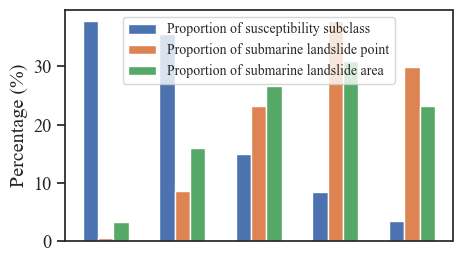

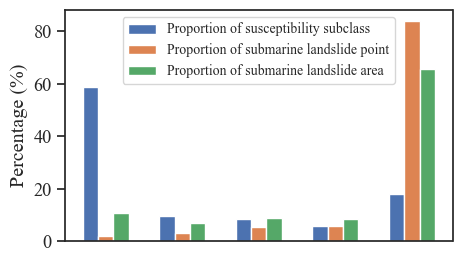

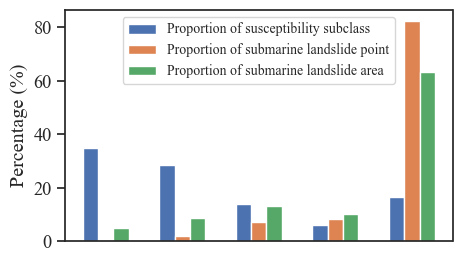

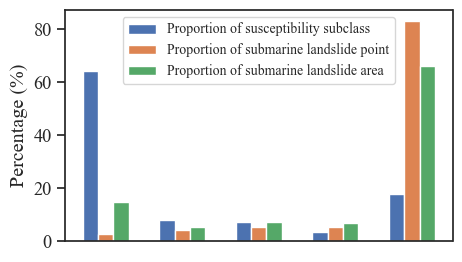

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,3))
# x=['Very lower','Lower','Moderate','High','Very high']
x=np.arange(1,6)
subclass_name=['FR_sub','LR_sub','RF_sub','MLP_sub']
area_name=['FR_prop','LR_prop','RF_prop','MLP_prop']
point_name=['FR_point_prop','LR_point_prop','RF_point_prop','MLP_point_prop']

count_picture_name=['FR_count.png','LR_count.png','RF_count.png','ANN_count.png',]


for i in range(4):
    fig=plt.figure(i,figsize=(5,3))
    plt.bar(x-0.1,subclass_point_class[subclass_name[i]]*100,width=0.2,label='Proportion of susceptibility subclass')
    plt.bar(x+0.1,subclass_point_class[point_name[i]]*100,width=0.2,label='Proportion of submarine landslide point')
    plt.bar(x+0.3,subclass_point_class[area_name[i]]*100,width=0.2,label='Proportion of submarine landslide area')
    # plt.xlabel(r'LSI')
    plt.ylabel(r'Percentage (%)')
    plt.xticks([])
    plt.legend(fontsize=10,loc='upper center')
    fig.savefig(count_picture_name[i],dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.savefig(r'model.png',dpi=300,bbox_inches='tight')
plt.show()